### About Top2Vec Topic Modeling - Difference from LDA Topic Models & the Role of Word Embdeddings


1. Top2Vec is a topic modeling technique that uses a combination of document clustering and word embeddings to identify topics in a corpus of text data. It is different from LDA (Latent Dirichlet Allocation) topic modeling in several ways.


2. LDA topic modeling is a generative probabilistic model that assumes that documents are generated from a mixture of topics, and each topic is a probability distribution over words. The goal of LDA is to infer the underlying topic distribution for each document and the word distribution for each topic.


3. In contrast, Top2Vec does not assume any generative model for the corpus. Instead, it first clusters the documents into groups that represent "topics" using a hierarchical clustering algorithm. It then generates a vector representation of each cluster using a combination of the document vectors and the centroid of the cluster. Finally, it uses a nearest-neighbor search to identify the most representative documents for each cluster, and uses these documents to extract the most relevant keywords for the topic.


4. The role of word embeddings in Top2Vec is to convert the raw text data into a dense vector representation that captures the semantic meaning of the words. Word embeddings are generated using a neural network that is trained on a large corpus of text data to predict the context in which each word appears. This results in a dense vector representation of each word that captures its semantic meaning, such that words with similar meanings have similar vector representations.


5. Top2Vec uses these word embeddings to generate document embeddings, which are vector representations of each document that capture the semantic meaning of the words in the document. These document embeddings are then used in the hierarchical clustering algorithm to group similar documents together into "topics".

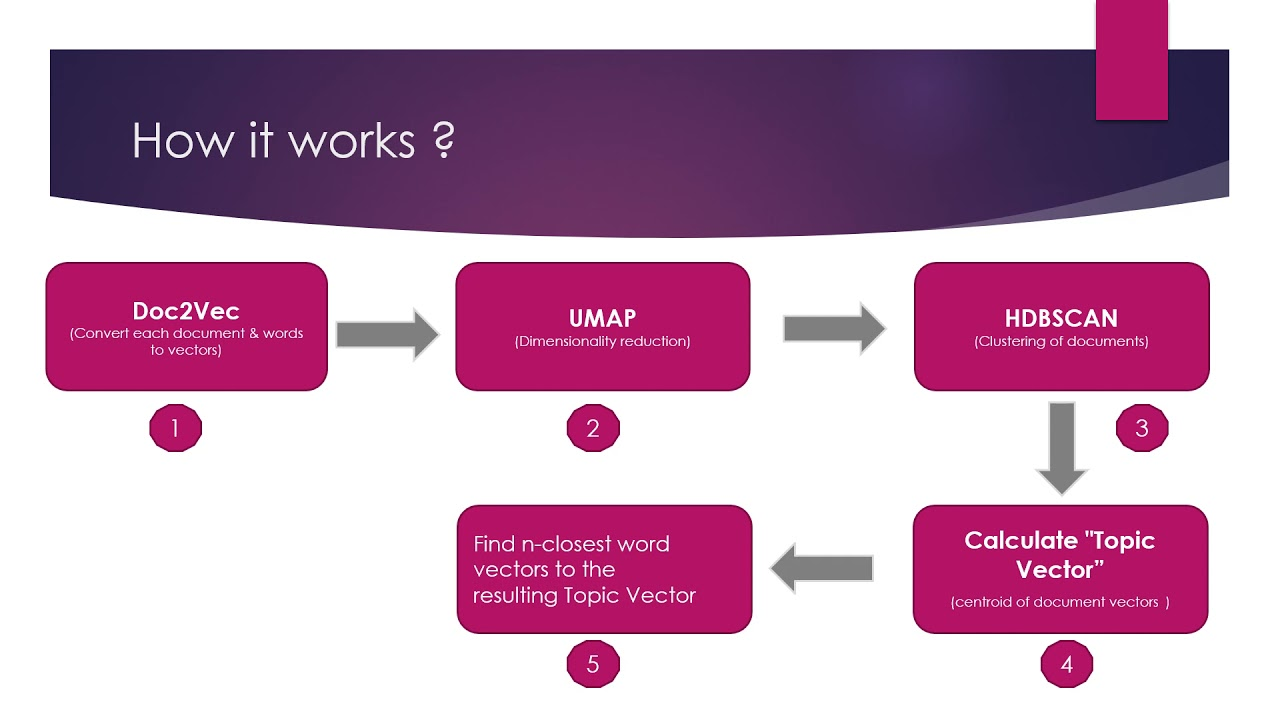

## Importing the Relvant Packages

In [ ]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

## Read Corpus (OCR Output File)

In [3]:
post = pd.read_csv("../results/cs_post.csv")
print(post.columns)
print(post.shape[0])

In [19]:
sample = pd.read_csv("../results/sample_output.csv")
print(sample.columns)
print(sample.shape[0])

Index(['job_code', 'file_path', 'ocrd_text', 'clean_text', 'plain_accuracy',
       'clean_accuracy'],
      dtype='object')
500


## Convert to the Relevant Data Type

In [6]:
post_docs = post['clean_text'].astype(str)
post_docs = post_docs.to_numpy()

In [20]:
sample_post_docs = sample['clean_text'].astype(str)
sample_post_docs = sample_post_docs.to_numpy()

## Build the Topic Model

In [7]:
model = Top2Vec(post_docs, embedding_model='universal-sentence-encoder')

2023-05-02 21:05:36,308 - top2vec - INFO - Pre-processing documents for training
2023-05-02 21:05:37,741 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-05-02 21:16:06.175225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-02 21:16:06.180317: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-02 21:16:13,104 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-02 21:16:13.166980: I tensorflow/core/common_runtime/exec

In [9]:
#model = Top2Vec.load("cs_post_model.pb")

In [21]:
sample_model = Top2Vec(sample_post_docs, embedding_model='universal-sentence-encoder')

2023-05-02 22:30:46,836 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-05-02 22:30:47,089 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-05-02 22:30:56,663 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-02 22:30:56.715905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]
2023-05-02 22:30:57,563 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-02 22:31:00,396 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
202

## Inspect Topics

In [8]:
model.get_num_topics()

56

In [22]:
sample_model.get_num_topics()

4

In [12]:
model.save("../results/post_cs_topics.pb")

In [31]:
post_cs_skills_list = list(model.topic_words)
for topic in post_cs_skills_list[:10]:
    print(topic)
    print("\n")

['devops' 'erp' 'kanban' 'analyst' 'sdlc' 'scrum' 'coding' 'microservices'
 'backend' 'balsamiq' 'agile' 'saas' 'ux' 'frontend' 'salesforce' 'nosql'
 'developed' 'developing' 'certifications' 'competencies' 'msc'
 'fullstack' 'cms' 'sap' 'resume' 'analytical' 'qualifications' 'jira'
 'nontechnical' 'workflows' 'develop' 'developer' 'deliverables' 'degree'
 'dba' 'architect' 'qualification' 'consultant' 'ict' 'specialization'
 'internship' 'jmeter' 'sinhala' 'selenium' 'nonfunctional' 'apis'
 'diploma' 'technologies' 'frameworks' 'php']


['devops' 'microservices' 'nosql' 'saas' 'backend' 'reactjs' 'kanban'
 'fullstack' 'sdlc' 'frontend' 'scrum' 'jmeter' 'salesforce' 'agile'
 'hybris' 'jira' 'nodejs' 'frameworks' 'tdd' 'docker' 'architectures'
 'weblogic' 'aws' 'developer' 'coding' 'ux' 'apis' 'selenium'
 'technologies' 'cms' 'erp' 'balsamiq' 'certifications' 'angularjs'
 'angular' 'nontechnical' 'developers' 'azure' 'php' 'vuejs' 'analyst'
 'java' 'mongodb' 'developing' 'laravel' 'soa'

---

In [32]:
sample_skills_list = list(sample_model.topic_words)
for topic in sample_skills_list:
    print(topic)
    print("\n")

['agile' 'scrum' 'frontend' 'frameworks' 'developer' 'developing' 'php'
 'developers' 'technologies' 'engineer' 'develop' 'aspnet' 'java'
 'angular' 'oracle' 'api' 'html' 'ui' 'qualifications' 'qualification'
 'net' 'ee' 'mysql' 'engineering' 'sql' 'web' 'engineers' 'jquery'
 'analytical' 'css' 'development' 'architecture' 'bachelors' 'bsc'
 'skills' 'database' 'degree' 'designing' 'above' 'software' 'programming'
 'framework' 'javascript' 'qa' 'apply' 'mvc' 'automated' 'handson' 'tech'
 'expertise']


['angular' 'frontend' 'javascript' 'html' 'jquery' 'aspnet' 'frameworks'
 'css' 'react' 'js' 'agile' 'mvc' 'web' 'php' 'scrum' 'developer'
 'technologies' 'java' 'developing' 'analytical' 'framework' 'develop'
 'programming' 'net' 'sql' 'developers' 'engineers' 'oracle' 'ui' 'ee'
 'aws' 'engineer' 'database' 'expertise' 'development' 'mysql'
 'experience' 'software' 'engineering' 'designing' 'skills' 'api'
 'advantage' 'integration' 'applied' 'qualifications' 'apply' 'degree'
 'client' '

### Topic Sizes and Topic Numbers

In [23]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [24]:
topic_sizes

array([317, 255, 168, 125, 119, 119, 118, 113, 107, 103,  82,  82,  81,
        80,  80,  79,  69,  63,  62,  60,  59,  56,  54,  54,  49,  48,
        48,  45,  44,  42,  41,  40,  39,  38,  38,  36,  35,  34,  33,
        33,  32,  31,  30,  30,  29,  28,  26,  22,  21,  21,  21,  20,
        19,  18,  18,  14])

In [25]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

### Topic Size Reduction

In [26]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=10)

In [27]:
post_cs_topics_reduced_20 = list(topic_mapping)

In [30]:
for topic in post_cs_topics_reduced_20:
    print(topic)

[4, 25, 45, 35, 12, 42, 50, 39, 23, 22, 28, 29, 40, 43, 49, 51, 0]
[5, 53, 30, 19, 32, 20, 36, 55, 1]
[6, 34, 41, 15, 54, 44, 27, 26, 24]
[13, 3]
[18, 33, 31, 47, 16]
[38, 17, 10, 11]
[21, 2]
[37, 9]
[14, 46, 7]
[52, 48, 8]


---